# Tutorial 04 - Referencing Methods for Ephys Data

eba_toolkit makes it easy to re-refence a data set or subsets of data using any channel as a reference. It also has emplementations of common average referencing techniques including common median reference and common mean reference. The referencing methods are written in two methods.
* channel_reference
 - Used for rereferencing a channel or a subset of channels to any other channel in the data set.
* common_reference
 - Used for referencing a data set or a subset of channels within a data set to either a common mean or a common median average. 
 
More information on the use of a common mean average in electrophysiology data sets can be found here:

*Ludwig, K. A. et al. Using a Common Average Reference to Improve Cortical Neuron Recordings From Microelectrode Arrays. Journal of Neurophysiology 101, 1679–1689 (2009). doi.org/10.1152/jn.90989.2008.*

More infomration on the use of a common median reference can be found here:

*Rolston, J. D., Gross, R. E. & Potter, S. M. Common median referencing for improved action potential detection with multielectrode arrays. in 2009 Annual International Conference of the IEEE Engineering in Medicine and Biology Society 1604–1607 (2009). doi:10.1109/IEMBS.2009.5333230.*

We can work with a single data set to exemplify the referencing methods. 

In [1]:
# import statements
import eba_toolkit
import numpy as np
import matplotlib.pyplot as plt

# path to directory containing the TDT tank
directory = r"C:\Users\malal\Documents\WITNE\pyCAP\TutorialExamples\pnpig191126-191204-151801"
data = eba_toolkit.Ephys(directory, stores=["RawE", "RawG"])

# Starting by removing the excess channel 'RawG 4'. We could do this either by the index in the channel list (7) or using the channel name directly. 
data = data.remove_ch('RawG 4')

# We can rename the channels using the set_ch_names method and providing a list of new channel names that matches the number of channels in the data set.
data = data.set_ch_names(['LIFE 1', 'LIFE 2', 'LIFE 3', 'LIFE 4', 'EMG 1', 'EMG 2', 'EMG 3'])

# Lets also set the types of the individual channels so that we can indepentently interact with LIFE and EMG channels
data = data.set_ch_types(['LIFE']*4 + ['EMG']*3)

c:\users\malal\documents\witne\pycap\eba-toolkit\eba_toolkit\io\ripple_io.py:13: UserWarning: No Neuroshare package found, Ripple files will not work
  warnings.warn("No Neuroshare package found, Ripple files will not work")


read from t=0s to t=153.36s


Let's start by plotting our data so that we can look at the noise levels on each channel and how they change between different referencing methods. 

The plot function for the eba_toolkit.Ephys class has a y_lim attribute that we can use to set the y-axis limits so that they are consistent between plots. By default y_lim is set to 'auto', which calculates that standard deviation of the data being displayed in the plot and sets the bouds so that there is 6 standard deviations between each trace and 6 standard deviations below/above the first/last trace. The other options are:
* *None or 'auto'*
 - Sets the bounds so that there is 6 standard deviations between each trace and 6 standard deviations below/above the first/last traces.
* *'max'*
 - Sets the bounds so that there is 6 standard deviations between each trace but distance below/above the first/last traces are set so that all of the available data is within the bounds of the plot.
* *int, float, or tuple of length 1*
 - Sets a value in the units of the data being ploted for the distance between and below/above each trace.
* *tuple of length 2*
 - Sets a value in the units of the data being ploted for the distance below/above the first/last traces. 6 standard deviations will still be used for the distance between traces.
* *tuple of length 3*
 - First value is the distance below the first trace, second value is the distance between each trace, third value is the distance above the final trace. All values are assumed to be in units matching the data being plotted.

Here we will calculate the standard deviation of the the origional data we plan to show on the graph and pass this as a float to the y_lim attribute

In [2]:
# x_lim value that we will use for each plot. This will plot the first 50 seconds of data
x_lim = (0,50) 

# Let's use data.array to get the data contained within the range of x_lim.
# We need to convert x_lim to indices. I will do this an easy easy using a method _time_to_index
start_index = data._time_to_index(x_lim[0])
end_index = data._time_to_index(x_lim[1])+1

# Get the array and calculate the standard deviation
data_array = data[:, start_index:end_index]
std_dev = np.std(data_array.flatten())

# Use 4x std_dev for the y limits
y_lim = 0.1 * std_dev

Notice that in this dataset there is a lot of common mode signal between the 4 life electrode channels. We will use this to look at the differences between rereferencing to a single channel vs. using common refrencing techniques. 

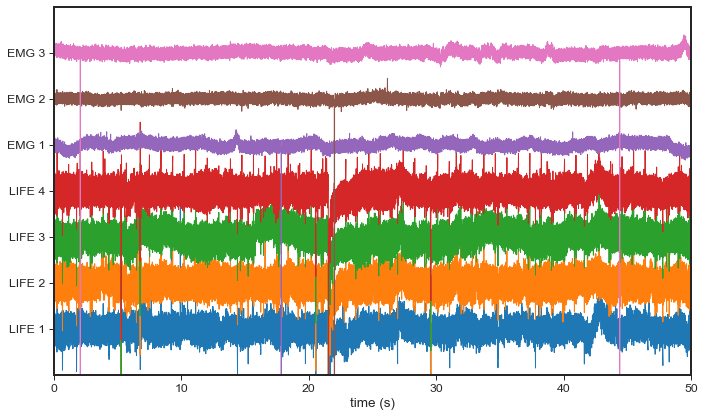

In [3]:
data.plot(x_lim=x_lim, y_lim=y_lim)

## Re-refrencing Data to a Channel
First, we can re-reference the data to one of the life electrode channels. Although, this will will help eliminate the common mode noise sources seen on the LIFE electrode channels we will quickly see that it also effects EMG channels, which would be undesireable in this case. 

Channel references will accept a channel name or an channel index of the channel to use as a refrence. 

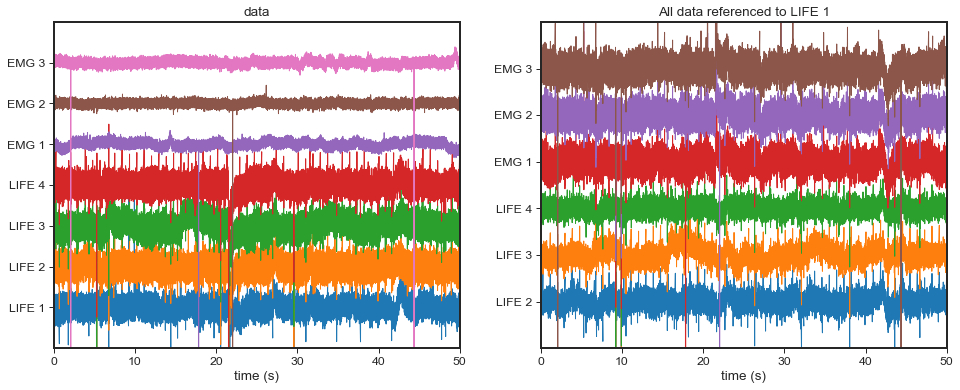

In [4]:
data_reference_1 = data.channel_reference('LIFE 1')

# Set up figure axes that we can plot on
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# Label axes and plot data. 
ax1.set_title('data')
# The axis attribute is used to provide a matplotlib axis to plot on.
# Show is set to False to prevent the plot function from automatically showing the plot within the jupyter notebook.
data.plot(axis = ax1, x_lim=x_lim, y_lim=y_lim, show=False)
ax2.set_title('All data referenced to LIFE 1')
data_reference_1.plot(axis = ax2, x_lim=x_lim, y_lim=y_lim, show=False)

# Tell matplotlib to show the plot within a jupyter notebook
plt.show()

This did a good job at removing the common mode noise from from the LIFE electrode channels. However, we removed channel 'LIFE 1' in the process and subtracted a significant amount of noise into our EMG channles. As such, it would have made more sense to only re-reference within the the LIFE electrode channels. Since we se the ch_types when we loaded in the data, this is faily easy to accomplish. All we need to do is include the ch_types attribut for the channel_reference class.

It is worth nothing that many methods within the Ephy class have some combination of a channel, channels, ch_type, and/or ch_types atributes. These can be used to select a subset of channels within the data set that will be acted on by the method.

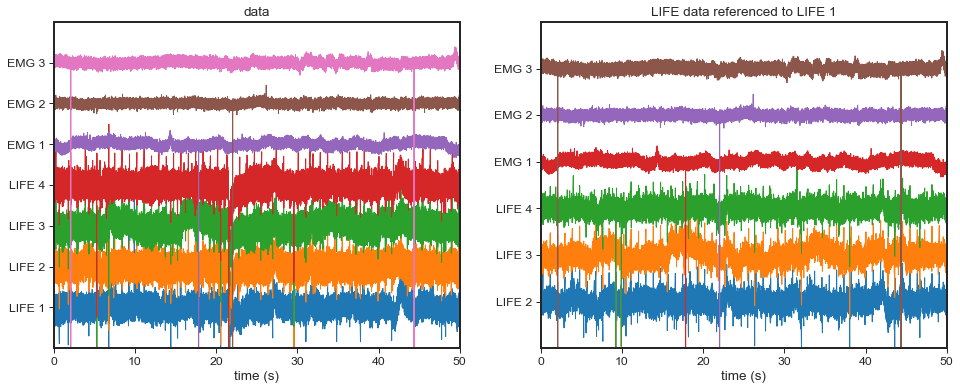

In [5]:
data_reference_2 = data.channel_reference('LIFE 1', ch_type='LIFE')

# Set up figure axes that we can plot on
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# Label axes and plot data. 
ax1.set_title('data')
# The axis attribute is used to provide a matplotlib axis to plot on.
# Show is set to False to prevent the plot function from automatically showing the plot within the jupyter notebook.
data.plot(axis = ax1, x_lim=x_lim, y_lim=y_lim, show=False)
ax2.set_title('LIFE data referenced to LIFE 1')
data_reference_2.plot(axis = ax2,  x_lim=x_lim, y_lim=y_lim, show=False)

# Tell matplotlib to show the plot within a jupyter notebook
plt.show()

## Using a Common Mean or Common Median Reference

Often, a better way to remove common mode noise can be to do so using either a common median reference, or a common mean reference. Here is an axample of each applied with in the LIFE electrode channels.

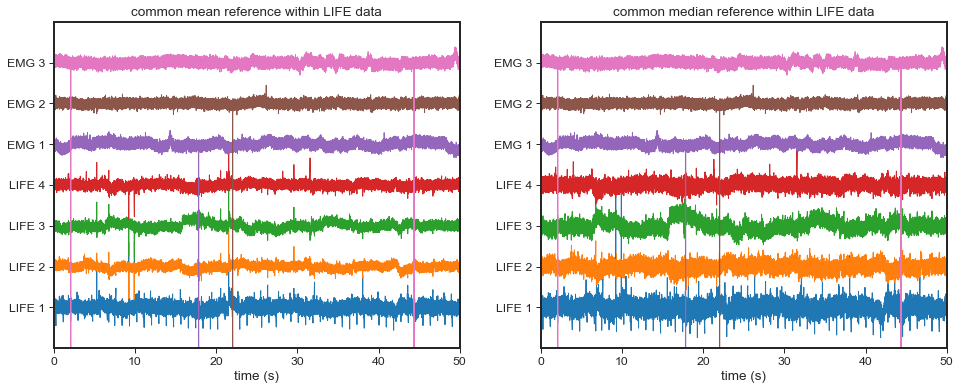

In [6]:
data_common_mean = data.common_reference(method='mean', ch_type='LIFE')
data_common_median = data.common_reference(method='median', ch_type='LIFE')

# Set up figure axes that we can plot on
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# Label axes and plot data. 
ax1.set_title('common mean reference within LIFE data')
# The axis attribute is used to provide a matplotlib axis to plot on.
# Show is set to False to prevent the plot function from automatically showing the plot within the jupyter notebook.
data_common_mean.plot(axis = ax1,  x_lim=x_lim, y_lim=y_lim, show=False)
ax2.set_title('common median reference within LIFE data')
data_common_median.plot(axis = ax2,  x_lim=x_lim, y_lim=y_lim, show=False)

# Tell matplotlib to show the plot within a jupyter notebook
plt.show()

Here we can see that the lowest peak to peak noise is give by the common mean reference, however large artifacts from other channels can sometimes be 'subtracted into' the data set. This problem is exacerbated when using a common mean reference with a small number of channels. See Ludwig et. al. for a more detailed description of this phenomena. 

For a small number of channels a common median reference can provide a good tradeoff between common mode noise suppresssion without subtracting in artifacts from other recording channels.